In [1]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import rasterio
from sklearn.utils import shuffle

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.model_selection import validation_curve

import sys
sys.path.append('../src/')
import aposch_cv_src as aposch

Read in HLS as a single TIFF:

In [3]:
# where to go
sat = 'L30'
year = 2020
tile_path = '10/S/F/H'
tile = '10SFH'
final_folder = 'HLS.L30.T10SFH.2020007T183941.v2.0'
band = 'B03'

path = f'../data/hls_23feb23/{sat}/{year}/{tile_path}/{final_folder}/{final_folder}.{band}.tif'

#features=[]
#print('Loading tiff file', path)

src = src_green = rasterio.open(path)
print(src.crs.is_geographic)


False


Here's useful info I can get out of a raster dataset:

In [25]:
print(src.height, src.width, src.count)
print(src.bounds)
print(src.transform)
print('Upper left corner is', src.transform * (0,0))

src.crs

3660 3660 1
BoundingBox(left=600000.0, bottom=4190220.0, right=709800.0, top=4300020.0)
| 30.00, 0.00, 600000.00|
| 0.00,-30.00, 4300020.00|
| 0.00, 0.00, 1.00|
Upper left corner is (600000.0, 4300020.0)


CRS.from_wkt('PROJCS["UTM Zone 10, Northern Hemisphere",GEOGCS["Unknown datum based upon the WGS 84 ellipsoid",DATUM["Not specified (based on WGS 84 spheroid)",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-123],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

In [26]:
array = src.read(1)
feature = array.flatten()
#features.append(feature)
print(f'Number of pixels for {final_folder}.{band} is length n={len(feature)}')

Number of pixels for HLS.L30.T10SFH.2020007T183941.v2.0.B03 is length n=13395600


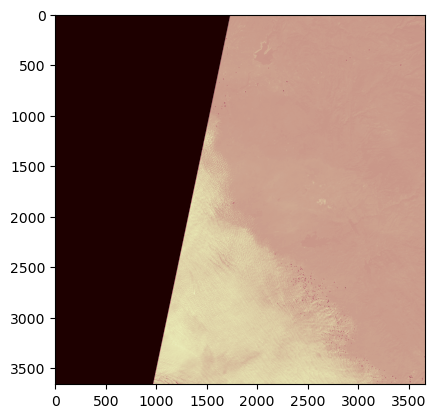

In [27]:
plt.imshow(array, cmap='pink')
#plt.show()

In [28]:
src_green = src

Try this other date:

In [7]:
final_folder = 'HLS.L30.T10SFH.2020119T183859.v2.0'

In [8]:
# where to go
sat = 'L30'
year = 2020
tile_path = '10/S/F/H'
tile = '10SFH'
#final_folder = 'HLS.L30.T10SFH.2020007T183941.v2.0'
band = 'B03'


path = f'../data/hls_23feb23/{sat}/{year}/{tile_path}/{final_folder}/{final_folder}.{band}.tif'

features=[]
print('Loading tiff file', path)
with rasterio.open(path) as src:
    array = src.read(1)
    feature = array.flatten()
    features.append(feature)
    print(f'Number of pixels for {final_folder}.{band} is length n={len(feature)}')

Loading tiff file ../data/hls_23feb23/L30/2020/10/S/F/H/HLS.L30.T10SFH.2020119T183859.v2.0/HLS.L30.T10SFH.2020119T183859.v2.0.B03.tif
Number of pixels for HLS.L30.T10SFH.2020119T183859.v2.0.B03 is length n=13395600


In [9]:
features[0]

array([-9999, -9999, -9999, ...,   510,   538,   553], dtype=int16)

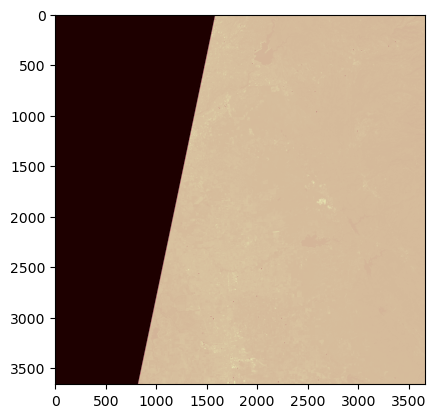

In [10]:
plt.imshow(array, cmap='pink')
#plt.show()

### Above is HLS green band

### Below is HLS QA band

In [14]:
# where to go for QA band
sat = 'L30'
year = 2020
tile_path = '10/S/F/H'
tile = '10SFH'
final_folder = 'HLS.L30.T10SFH.2020007T183941.v2.0'
band = 'Fmask'

path = f'../data/hls_23feb23/{sat}/{year}/{tile_path}/{final_folder}/{final_folder}.{band}.tif'

#features=[]
#print('Loading tiff file', path)

src = rasterio.open(path)
print(src.crs.is_geographic)


False


Here's useful info I can get out of a raster dataset:

In [15]:
print(src.height, src.width, src.count)
print(src.bounds)
print(src.transform)
print('Upper left corner is', src.transform * (0,0))

src.crs

3660 3660 1
BoundingBox(left=600000.0, bottom=4190220.0, right=709800.0, top=4300020.0)
| 30.00, 0.00, 600000.00|
| 0.00,-30.00, 4300020.00|
| 0.00, 0.00, 1.00|
Upper left corner is (600000.0, 4300020.0)


CRS.from_wkt('PROJCS["UTM Zone 10, Northern Hemisphere",GEOGCS["Unknown datum based upon the WGS 84 ellipsoid",DATUM["Not specified (based on WGS 84 spheroid)",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-123],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

In [18]:
new_crs = src.crs.to_crs("EPSG:4326")

AttributeError: 'rasterio.crs.CRS' object has no attribute 'to_crs'

In [16]:
array = src.read(1)
feature = array.flatten()
#features.append(feature)
print(f'Number of pixels for {final_folder}.{band} is length n={len(feature)}')

Number of pixels for HLS.L30.T10SFH.2020007T183941.v2.0.Fmask is length n=13395600


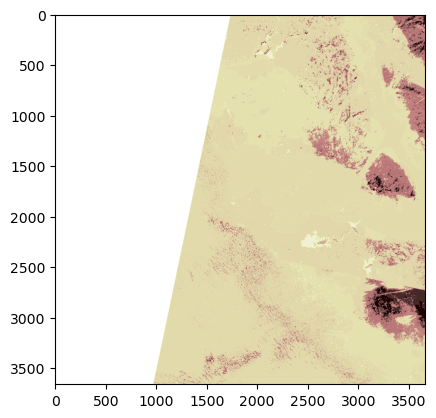

In [17]:
plt.imshow(array, cmap='pink')
#plt.show()

### Above is HLS QA band

### Below is CDL

In [4]:
state = 'California'
year = 2020
features = []

path = f'../data/{state}CDL_{year}/clipped.TIF'
print('Loading tiff file', path)
src_CDL = rasterio.open(path)

Loading tiff file ../data/CaliforniaCDL_2020/clipped.TIF


In [29]:
array = src.read(1)
feature = array.flatten()
print(f'Feature for year {year} is length n={len(feature)}')

Loading tiff file ../data/CaliforniaCDL_2020/clipped.TIF
Feature for year 2020 is length n=2869789752


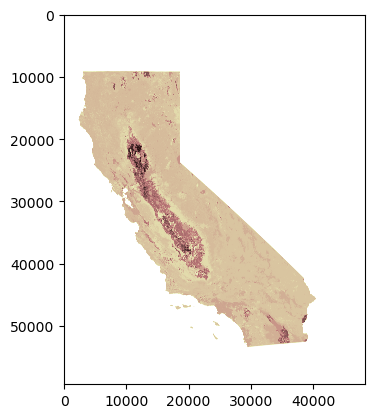

In [30]:
plt.imshow(array, cmap='pink')
#plt.show()

ValueError: {0: (0, 0, 0, 255), 1: (255, 211, 0, 255), 2: (255, 38, 38, 255), 3: (0, 168, 228, 255), 4: (255, 158, 11, 255), 5: (38, 112, 0, 255), 6: (255, 255, 0, 255), 7: (0, 0, 0, 255), 8: (0, 0, 0, 255), 9: (0, 0, 0, 255), 10: (112, 165, 0, 255), 11: (0, 175, 75, 255), 12: (221, 165, 11, 255), 13: (221, 165, 11, 255), 14: (126, 211, 255, 255), 15: (0, 0, 0, 255), 16: (0, 0, 0, 255), 17: (0, 0, 0, 255), 18: (0, 0, 0, 255), 19: (0, 0, 0, 255), 20: (0, 0, 0, 255), 21: (226, 0, 124, 255), 22: (137, 98, 84, 255), 23: (216, 181, 107, 255), 24: (165, 112, 0, 255), 25: (214, 158, 188, 255), 26: (112, 112, 0, 255), 27: (172, 0, 124, 255), 28: (160, 89, 137, 255), 29: (112, 0, 73, 255), 30: (214, 158, 188, 255), 31: (209, 255, 0, 255), 32: (126, 153, 255, 255), 33: (214, 214, 0, 255), 34: (209, 255, 0, 255), 35: (0, 175, 75, 255), 36: (255, 165, 226, 255), 37: (165, 242, 140, 255), 38: (0, 175, 75, 255), 39: (214, 158, 188, 255), 40: (0, 0, 0, 255), 41: (168, 0, 228, 255), 42: (165, 0, 0, 255), 43: (112, 38, 0, 255), 44: (0, 175, 75, 255), 45: (177, 126, 255, 255), 46: (112, 38, 0, 255), 47: (255, 102, 102, 255), 48: (255, 102, 102, 255), 49: (255, 204, 102, 255), 50: (255, 102, 102, 255), 51: (0, 175, 75, 255), 52: (0, 221, 175, 255), 53: (84, 255, 0, 255), 54: (242, 163, 119, 255), 55: (255, 102, 102, 255), 56: (0, 175, 75, 255), 57: (126, 211, 255, 255), 58: (232, 191, 255, 255), 59: (175, 255, 221, 255), 60: (0, 175, 75, 255), 61: (191, 191, 119, 255), 62: (0, 0, 0, 255), 63: (147, 204, 147, 255), 64: (198, 214, 158, 255), 65: (204, 191, 163, 255), 66: (255, 0, 255, 255), 67: (255, 142, 170, 255), 68: (186, 0, 79, 255), 69: (112, 68, 137, 255), 70: (0, 119, 119, 255), 71: (177, 154, 112, 255), 72: (255, 255, 126, 255), 73: (0, 0, 0, 255), 74: (181, 112, 91, 255), 75: (0, 165, 130, 255), 76: (233, 214, 175, 255), 77: (177, 154, 112, 255), 78: (0, 0, 0, 255), 79: (0, 0, 0, 255), 80: (0, 0, 0, 255), 81: (242, 242, 242, 255), 82: (154, 154, 154, 255), 83: (75, 112, 163, 255), 84: (0, 0, 0, 255), 85: (0, 0, 0, 255), 86: (0, 0, 0, 255), 87: (126, 177, 177, 255), 88: (232, 255, 191, 255), 89: (0, 0, 0, 255), 90: (0, 0, 0, 255), 91: (0, 0, 0, 255), 92: (0, 255, 255, 255), 93: (0, 0, 0, 255), 94: (0, 0, 0, 255), 95: (0, 0, 0, 255), 96: (0, 0, 0, 255), 97: (0, 0, 0, 255), 98: (0, 0, 0, 255), 99: (0, 0, 0, 255), 100: (0, 0, 0, 255), 101: (0, 0, 0, 255), 102: (0, 0, 0, 255), 103: (0, 0, 0, 255), 104: (0, 0, 0, 255), 105: (0, 0, 0, 255), 106: (0, 0, 0, 255), 107: (0, 0, 0, 255), 108: (0, 0, 0, 255), 109: (0, 0, 0, 255), 110: (0, 0, 0, 255), 111: (75, 112, 163, 255), 112: (211, 226, 249, 255), 113: (0, 0, 0, 255), 114: (0, 0, 0, 255), 115: (0, 0, 0, 255), 116: (0, 0, 0, 255), 117: (0, 0, 0, 255), 118: (0, 0, 0, 255), 119: (0, 0, 0, 255), 120: (0, 0, 0, 255), 121: (154, 154, 154, 255), 122: (154, 154, 154, 255), 123: (154, 154, 154, 255), 124: (154, 154, 154, 255), 125: (0, 0, 0, 255), 126: (0, 0, 0, 255), 127: (0, 0, 0, 255), 128: (0, 0, 0, 255), 129: (0, 0, 0, 255), 130: (0, 0, 0, 255), 131: (204, 191, 163, 255), 132: (0, 0, 0, 255), 133: (0, 0, 0, 255), 134: (0, 0, 0, 255), 135: (0, 0, 0, 255), 136: (0, 0, 0, 255), 137: (0, 0, 0, 255), 138: (0, 0, 0, 255), 139: (0, 0, 0, 255), 140: (0, 0, 0, 255), 141: (147, 204, 147, 255), 142: (147, 204, 147, 255), 143: (147, 204, 147, 255), 144: (0, 0, 0, 255), 145: (0, 0, 0, 255), 146: (0, 0, 0, 255), 147: (0, 0, 0, 255), 148: (0, 0, 0, 255), 149: (0, 0, 0, 255), 150: (0, 0, 0, 255), 151: (0, 0, 0, 255), 152: (198, 214, 158, 255), 153: (0, 0, 0, 255), 154: (0, 0, 0, 255), 155: (0, 0, 0, 255), 156: (0, 0, 0, 255), 157: (0, 0, 0, 255), 158: (0, 0, 0, 255), 159: (0, 0, 0, 255), 160: (0, 0, 0, 255), 161: (0, 0, 0, 255), 162: (0, 0, 0, 255), 163: (0, 0, 0, 255), 164: (0, 0, 0, 255), 165: (0, 0, 0, 255), 166: (0, 0, 0, 255), 167: (0, 0, 0, 255), 168: (0, 0, 0, 255), 169: (0, 0, 0, 255), 170: (0, 0, 0, 255), 171: (0, 0, 0, 255), 172: (0, 0, 0, 255), 173: (0, 0, 0, 255), 174: (0, 0, 0, 255), 175: (0, 0, 0, 255), 176: (232, 255, 191, 255), 177: (0, 0, 0, 255), 178: (0, 0, 0, 255), 179: (0, 0, 0, 255), 180: (0, 0, 0, 255), 181: (0, 0, 0, 255), 182: (0, 0, 0, 255), 183: (0, 0, 0, 255), 184: (0, 0, 0, 255), 185: (0, 0, 0, 255), 186: (0, 0, 0, 255), 187: (0, 0, 0, 255), 188: (0, 0, 0, 255), 189: (0, 0, 0, 255), 190: (126, 177, 177, 255), 191: (0, 0, 0, 255), 192: (0, 0, 0, 255), 193: (0, 0, 0, 255), 194: (0, 0, 0, 255), 195: (126, 177, 177, 255), 196: (0, 0, 0, 255), 197: (0, 0, 0, 255), 198: (0, 0, 0, 255), 199: (0, 0, 0, 255), 200: (0, 0, 0, 255), 201: (0, 0, 0, 255), 202: (0, 0, 0, 255), 203: (0, 0, 0, 255), 204: (0, 255, 140, 255), 205: (214, 158, 188, 255), 206: (255, 102, 102, 255), 207: (255, 102, 102, 255), 208: (255, 102, 102, 255), 209: (255, 102, 102, 255), 210: (255, 142, 170, 255), 211: (51, 73, 51, 255), 212: (228, 112, 38, 255), 213: (255, 102, 102, 255), 214: (255, 102, 102, 255), 215: (102, 153, 76, 255), 216: (255, 102, 102, 255), 217: (177, 154, 112, 255), 218: (255, 142, 170, 255), 219: (255, 102, 102, 255), 220: (255, 142, 170, 255), 221: (255, 102, 102, 255), 222: (255, 102, 102, 255), 223: (255, 142, 170, 255), 224: (0, 175, 75, 255), 225: (255, 211, 0, 255), 226: (255, 211, 0, 255), 227: (255, 102, 102, 255), 228: (255, 210, 0, 255), 229: (255, 102, 102, 255), 230: (137, 98, 84, 255), 231: (255, 102, 102, 255), 232: (255, 38, 38, 255), 233: (226, 0, 124, 255), 234: (255, 158, 11, 255), 235: (255, 158, 11, 255), 236: (165, 112, 0, 255), 237: (255, 211, 0, 255), 238: (165, 112, 0, 255), 239: (38, 112, 0, 255), 240: (38, 112, 0, 255), 241: (255, 211, 0, 255), 242: (0, 0, 153, 255), 243: (255, 102, 102, 255), 244: (255, 102, 102, 255), 245: (255, 102, 102, 255), 246: (255, 102, 102, 255), 247: (255, 102, 102, 255), 248: (255, 102, 102, 255), 249: (255, 102, 102, 255), 250: (255, 102, 102, 255), 251: (0, 0, 0, 255), 252: (0, 0, 0, 255), 253: (0, 0, 0, 255), 254: (38, 112, 0, 255), 255: (0, 0, 0, 0)} is not a valid value for cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

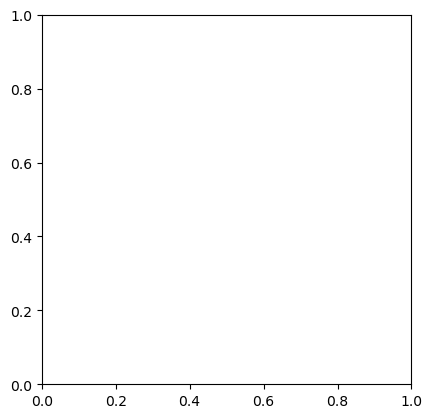

In [31]:
plt.imshow(array, cmap=src.colormap(1))
#plt.show()

In [32]:
print(src.height, src.width, src.count)
print(src.bounds)
print(src.transform)
print('Upper left corner is', src.transform * (0,0))

src.crs

59368 48339 1
BoundingBox(left=-13918856.586382784, bottom=3655090.964396687, right=-12468686.586382784, top=5436130.964396687)
| 30.00, 0.00,-13918856.59|
| 0.00,-30.00, 5436130.96|
| 0.00, 0.00, 1.00|
Upper left corner is (-13918856.586382784, 5436130.964396687)


CRS.from_epsg(3857)

In [33]:
src.crs.to_wkt()

'PROJCS["WGS 84 / Pseudo-Mercator",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Mercator_1SP"],PARAMETER["central_meridian",0],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],EXTENSION["PROJ4","+proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs"],AUTHORITY["EPSG","3857"]]'

In [34]:
src_CDL = src

In [35]:
src_CDL.crs

CRS.from_epsg(3857)

In [36]:
src_green.crs

CRS.from_wkt('PROJCS["UTM Zone 10, Northern Hemisphere",GEOGCS["Unknown datum based upon the WGS 84 ellipsoid",DATUM["Not specified (based on WGS 84 spheroid)",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-123],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

In [6]:
from rasterio.warp import reproject
from rasterio import Affine as A

In [50]:
reproject(source=src_CDL.read(1),
          #destination=src_green.read(1),
          src_transform=src_CDL.transform,
          src_crs=src_CDL.crs,
          dst_crs=src_green.crs
          )

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8),
 Affine(23.73173555923867, 0.0, 306036.2215381264,
        0.0, -23.73173555923867, 4909894.494821331))

Note: the reproject function returns an array and an Affine matrix.

In [51]:
reproject(source=src_CDL.read(1),
          destination=src_green.read(1),
          src_transform=src_CDL.transform,
          src_crs=src_CDL.crs,
          dst_crs=src_green.crs
          )

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int16),
 Affine(340.0057424917481, 0.0, 306036.2215381264,
        0.0, -399.2443042592903, 4909894.494821331))

Below has comments for explanation.

## Reprojection: the canonical way

In [7]:
CDL_rpj = reproject(source=src_CDL.read(1), # this is an array
          destination=src_green.read(1), # this is another array
          src_transform=src_CDL.transform, # this is the transform corresponding to first array
          src_crs=src_CDL.crs, # this is the crs corresponding to first array
          dst_transform=src_green.transform, # this is the transform corresponding to second array
          dst_crs=src_green.crs, # this is the crs corresponding to second array
          )


# the output of the function should be an array that contains observation data from
# the first array, but has the crs and transform of the second array.

cdlrpj_array, cdlrpj_affine = CDL_rpj

CDL_rpj

(array([[  3,   3,   3, ..., 176, 176, 176],
        [  3,   3,   3, ..., 176, 176, 176],
        [  3,   3,   3, ..., 176, 176, 176],
        ...,
        [152, 176, 176, ..., 176, 176, 152],
        [152, 176, 176, ..., 176, 176, 152],
        [176, 176, 176, ..., 176, 176, 176]], dtype=int16),
 Affine(30.0, 0.0, 600000.0,
        0.0, -30.0, 4300020.0))

In [13]:
CDL_rpj2 = reproject(source=src_CDL.read(1), # this is an array
          #destination=src_green.read(1), # this is another array
          destination=np.zeros((10000,10000)),
          src_transform=src_CDL.transform, # this is the transform corresponding to first array
          src_crs=src_CDL.crs, # this is the crs corresponding to first array
          dst_transform=src_green.transform, # this is the transform corresponding to second array
          dst_crs=src_green.crs, # this is the crs corresponding to second array
          )


# the output of the function should be an array that contains observation data from
# the first array, but has the crs and transform of the second array.

cdlrpj_array2, cdlrpj_affine2 = CDL_rpj2

CDL_rpj2

(array([[  3.,   3.,   3., ..., 255., 255., 255.],
        [  3.,   3.,   3., ..., 255., 255., 255.],
        [  3.,   3.,   3., ..., 255., 255., 255.],
        ...,
        [255., 255., 255., ..., 152., 152., 152.],
        [255., 255., 255., ..., 152., 152., 152.],
        [255., 255., 255., ..., 152., 152., 152.]]),
 Affine(30.0, 0.0, 600000.0,
        0.0, -30.0, 4300020.0))

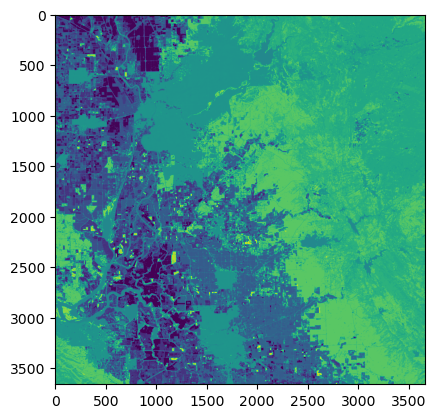

In [14]:
plt.imshow(cdlrpj_array)

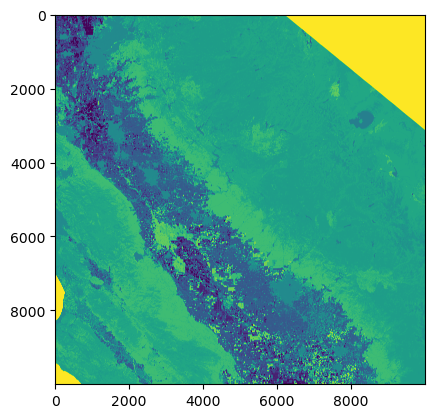

In [15]:
plt.imshow(cdlrpj_array2)

Learnings from directly above: if I specify a larger destination, the reproject function sticks with the same resolution but adds more pixels farther east and farther south.

### Test if I can change the resolution

Needs to still look like California.

In [50]:
transform5m = A.translation(600000, 4300020) * A.scale(5, -5)
transform5m

Affine(5.0, 0.0, 600000.0,
       0.0, -5.0, 4300020.0)

In [57]:
CDL_rpj3 = reproject(source=src_CDL.read(1), # this is an array
          #destination=src_green.read(1), # this is another array
          destination=np.zeros((60000,60000)),
          src_transform=src_CDL.transform, # this is the transform corresponding to first array
          src_crs=src_CDL.crs, # this is the crs corresponding to first array
          dst_transform=transform5m0, # this is the transform corresponding to second array
          dst_crs=src_green.crs, # this is the crs corresponding to second array
          )


# the output of the function should be an array that contains observation data from
# the first array, but has the crs and transform of the second array.

cdlrpj_array3, cdlrpj_affine3 = CDL_rpj3

CDL_rpj3

(array([[  3.,   3.,   3., ..., 255., 255., 255.],
        [  3.,   3.,   3., ..., 255., 255., 255.],
        [  3.,   3.,   3., ..., 255., 255., 255.],
        ...,
        [255., 255., 255., ..., 152., 152., 152.],
        [255., 255., 255., ..., 152., 152., 152.],
        [255., 255., 255., ..., 152., 152., 152.]]),
 Affine(5.0, 0.0, 600000.0,
        0.0, -5.0, 4300020.0))

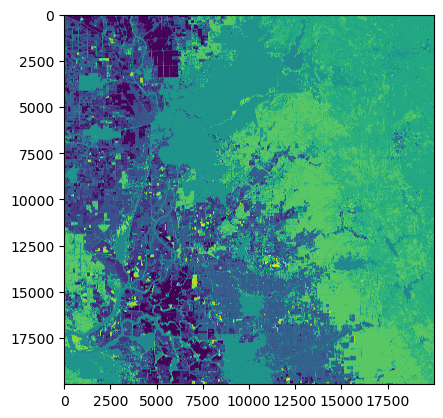

In [58]:
plt.imshow(cdlrpj_array3[:20000,:20000])

Upshot of above: Yes, I can change the resolution to 5m and things work as I expect. The upper left of the image is the same location, and looking at 20000 pixels at 5m resolution shows the same image as looking at 3660 pixels at 30m resolution. That all makes sense to me.

The questions remains: why am I having the same issue below? I thought I was doing the exact same thing below??

## Reprojection: tests of resolution

These didn't go the way I expected.

In [17]:
src_green.transform

Affine(30.0, 0.0, 600000.0,
       0.0, -30.0, 4300020.0)

In [26]:
transform30m0 = A.translation(600000, 4300020) * A.scale(30, -30)
transform30m0 == src_green.transform

True

In [29]:
transform30m = A.translation(600000, 4300020 - 30*15) * A.scale(30, -30)
transform30m

Affine(30.0, 0.0, 600000.0,
       0.0, -30.0, 4299570.0)

In [28]:
transform5m = A.translation(600000, 4300020 - 30*15) * A.scale(5, -5)
transform5m

Affine(5.0, 0.0, 600000.0,
       0.0, -5.0, 4299570.0)

In [56]:
transform5m0 = A.translation(600000, 4300020) * A.scale(5, -5)
transform5m0

Affine(5.0, 0.0, 600000.0,
       0.0, -5.0, 4300020.0)

In [38]:
transform1m = A.translation(600000, 4300020 - 30*15) * A.scale(1, -1)
transform1m

Affine(1.0, 0.0, 600000.0,
       0.0, -1.0, 4299570.0)

In [30]:
CDL_rpj30m = reproject(source=src_CDL.read(1), # this is an array
          destination=np.zeros((3,3)), # this is another array
          src_transform=src_CDL.transform, # this is the transform corresponding to first array
          src_crs=src_CDL.crs, # this is the crs corresponding to first array
          dst_transform=transform30m, # this is the transform corresponding to second array
          dst_crs=src_green.crs, # this is the crs corresponding to second array
          )


# the output of the function should be an array that contains observation data from
# the first array, but has the crs and transform of the second array.

cdlrpj_array30m, cdlrpj_affine30m = CDL_rpj30m

CDL_rpj30m

(array([[61., 61., 61.],
        [36., 61., 61.],
        [ 3.,  3., 36.]]),
 Affine(30.0, 0.0, 600000.0,
        0.0, -30.0, 4299570.0))

In [31]:
CDL_rpj5m = reproject(source=src_CDL.read(1), # this is an array
          destination=np.zeros((18,18)),
          src_transform=src_CDL.transform, # this is the transform corresponding to first array
          src_crs=src_CDL.crs, # this is the crs corresponding to first array
          dst_transform=transform5m, # this is the transform corresponding to second array
          dst_crs=src_green.crs, # this is the crs corresponding to second array
          )


# the output of the function should be an array that contains observation data from
# the first array, but has the crs and transform of the second array.

cdlrpj_array5m, cdlrpj_affine5m = CDL_rpj5m

CDL_rpj5m

(array([[ 36.,  36.,  61.,  61.,  61.,  61.,  61.,  61.,  61.,  61.,  61.,
          61.,  61.,  61.,  61.,  61.,  61.,  61.],
        [ 36.,  36.,  61.,  61.,  61.,  61.,  61.,  61.,  61.,  61.,  61.,
          61.,  61.,  61.,  61.,  61.,  61.,  61.],
        [ 36.,  36.,  61.,  61.,  61.,  61.,  61.,  61.,  61.,  61.,  61.,
          61.,  61.,  61.,  61.,  61.,  61.,  61.],
        [ 36.,  36.,  61.,  61.,  61.,  61.,  61.,  61.,  61.,  61.,  61.,
          61.,  61.,  61.,  61.,  61.,  61.,  61.],
        [ 36.,  36.,  36.,  61.,  61.,  61.,  61.,  61.,  61.,  61.,  61.,
          61.,  61.,  61.,  61.,  61.,  61.,  61.],
        [ 36.,  36.,  36.,  36.,  36.,  36.,  36.,  61.,  61.,  61.,  61.,
          61.,  61.,  61.,  61.,  61.,  61.,   6.],
        [ 36.,  36.,  36.,  36.,  36.,  36.,  36.,  61.,  61.,  61.,  61.,
          61.,  61.,  61.,  61.,  61.,  61.,   6.],
        [ 36.,  36.,  36.,  36.,  36.,  36.,  36.,  61.,  61.,  61.,  61.,
          61.,  61.,  61.,  61.,  61

In [40]:
CDL_rpj1m = reproject(source=src_CDL.read(1), # this is an array
          destination=np.zeros((30,30)),
          src_transform=src_CDL.transform, # this is the transform corresponding to first array
          src_crs=src_CDL.crs, # this is the crs corresponding to first array
          dst_transform=transform1m, # this is the transform corresponding to second array
          dst_crs=src_green.crs, # this is the crs corresponding to second array
          )


# the output of the function should be an array that contains observation data from
# the first array, but has the crs and transform of the second array.

cdlrpj_array1m, cdlrpj_affine1m = CDL_rpj1m

CDL_rpj1m

(array([[61., 61., 61., 61., 61., 61., 61., 61., 61., 61., 61., 61., 61.,
         61., 61., 61., 61., 61., 61., 61., 61., 61., 61., 61., 61., 61.,
         61., 61., 61., 61.],
        [61., 61., 61., 61., 61., 61., 61., 61., 61., 61., 36., 36., 61.,
         61., 61., 61., 61., 61., 61., 61., 61., 61., 61., 61., 61., 61.,
         61., 61., 61., 61.],
        [36., 36., 36., 36., 36., 36., 36., 36., 36., 36., 36., 36., 61.,
         61., 61., 61., 61., 61., 61., 61., 61., 61., 61., 61., 61., 61.,
         61., 61., 61., 61.],
        [36., 36., 36., 36., 36., 36., 36., 36., 36., 36., 36., 36., 61.,
         61., 61., 61., 61., 61., 61., 61., 61., 61., 61., 61., 61., 61.,
         61., 61., 61., 61.],
        [36., 36., 36., 36., 36., 36., 36., 36., 36., 36., 36., 36., 61.,
         61., 61., 61., 61., 61., 61., 61., 61., 61., 61., 61., 61., 61.,
         61., 61., 61., 61.],
        [36., 36., 36., 36., 36., 36., 36., 36., 36., 36., 36., 36., 61.,
         61., 61., 61., 61., 61., 61

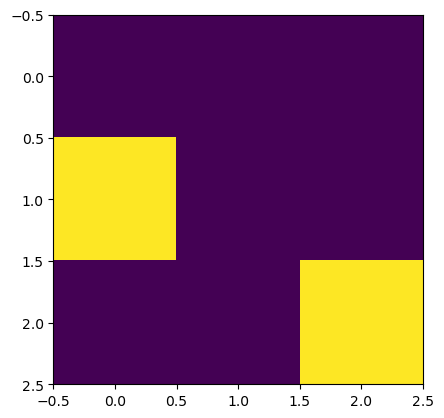

In [36]:
plt.imshow(cdlrpj_array30m==36)

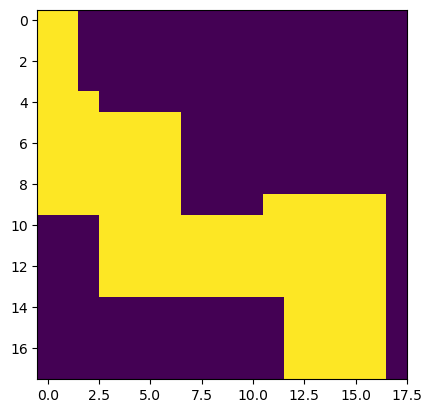

In [37]:
plt.imshow(cdlrpj_array5m==36)

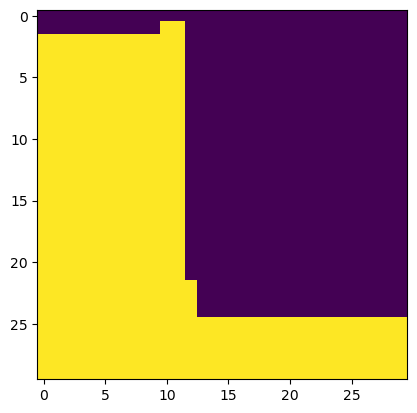

In [41]:
plt.imshow(cdlrpj_array1m==36)

Directly above, I'm actually looking at 3 completely different areas. Pretty sure about that. 

*Does the Affine specify the u-l corner of the u-l pixel, or does it specify the center of the u-l pixel?

## Using the same u-l point: a new tack

Use cdlrpj_array (30m res), cdlrpj_array3 (5m res), and cdlrpj_array4 (1m res).

Need to start at the 15th row of cdlrpj_array.
Need to start at 90th row of cdlrpj_array3.

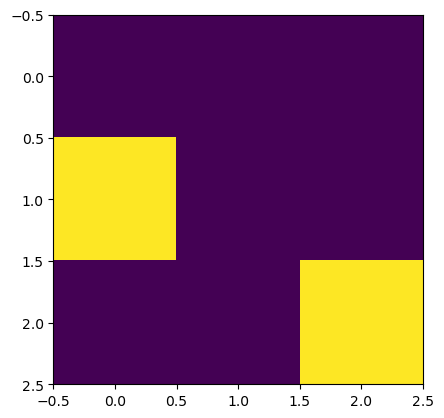

In [60]:
### 30-meter pixels ###
plt.imshow(cdlrpj_array[15:18,:3]==36)
#plt.imshow(cdlrpj_array[:18,:3]==36)
#plt.imshow(cdlrpj_array[:50,:50]==36)

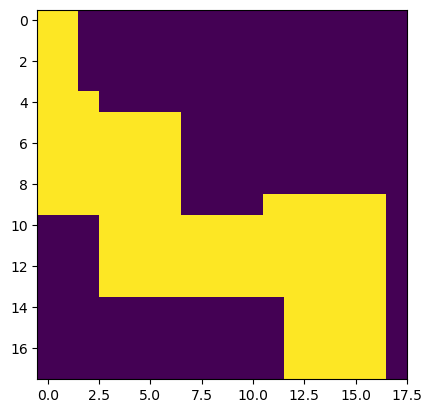

In [61]:
### 5-meter pixels ###
plt.imshow(cdlrpj_array3[90:108,:18]==36)
#plt.imshow(cdlrpj_array3[:108,:18]==36)
#plt.imshow(cdlrpj_array3[:300,:300]==36)

In [ ]:
transform5m = A.translation(600000, 4300020 - 30*15) * A.scale(5, -5)
transform5m

I think that if we omit any bits of information from the arguments, then reproject makes false assumptions.

In [60]:
print(type(CDL_rpj_array[0]))
print(type(CDL_rpj_array[1]))

print(CDL_rpj_array[0].size)
print(CDL_rpj_array[0].shape)

<class 'numpy.ndarray'>
<class 'affine.Affine'>
13395600
(3660, 3660)


The above is very promising. I want to try:
- ask for lat/long of certain pixels
    - I have a feeling they will be exactly the same in CDL versus in green band... could be worrying, if they are not supposed to be exactly the same
- check that we have a lot of grapes and tomatoes and some almonds in the CDL_prj_array
- figure out if lat/long are supposed to be exactly the same or not
    - if not, figure out how the reproject function snapped the CDL pixels onto the green band grid. this is the "Sanity check" that Shashank mentioned.

In [ ]:
reproject(source=src_CDL.read(1),
          destination=src_green.read(1),
          )

Make a function to check whether my reprojection did the right thing.

In [65]:
cdlrpj_array

array([[  3,   3,   3, ..., 176, 176, 176],
       [  3,   3,   3, ..., 176, 176, 176],
       [  3,   3,   3, ..., 176, 176, 176],
       ...,
       [152, 176, 176, ..., 176, 176, 152],
       [152, 176, 176, ..., 176, 176, 152],
       [176, 176, 176, ..., 176, 176, 176]], dtype=int16)

In [ ]:
def summarize_array(array):
    # coordinates of each corner
    UL = 
    UR = 
    LL =
    LR =
    # or if above is in the form of bounds, then that's okay too
    
    # summarize the most frequent land cover classes

In [69]:
cdlcnc = pd.read_csv('../data/CDL_codes_names_colors.csv', header=3)

In [70]:
cdlcnc

,Codes,Class_Names,Erdas_Red,Erdas_Green,Erdas_Blue,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,0,Background,0.0000,0.0000,0.0000,NaN,NaN,NaN,NaN
1,1,Corn,1.0000,0.8275,0.0000,NaN,NaN,NaN,NaN
2,2,Cotton,1.0000,0.1490,0.1490,NaN,NaN,NaN,NaN
3,3,Rice,0.0000,0.6588,0.8980,NaN,NaN,NaN,NaN
4,4,Sorghum,1.0000,0.6196,0.0471,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
251,251,,1.0000,0.8275,0.0000,NaN,NaN,NaN,NaN
252,252,,0.1490,0.4431,0.0000,NaN,NaN,NaN,NaN
253,253,,0.6471,0.4392,0.0000,NaN,NaN,NaN,NaN
254,254,Dbl Crop Barley/Soybeans,0.1490,0.4431,0.0000,NaN,NaN,NaN,NaN


In [130]:
vals, counts = np.unique(cdlrpj_array, return_counts=True)

tops = []
for i in range(len(vals)):
    if counts[i]>200000:
        name = cdlcnc.loc[cdlcnc['Codes']==vals[i],'Class_Names'].values[0]
        tops.append((vals[i],counts[i], name))
print(np.array(tops))

[['1' '355296' 'Corn']
 ['3' '267864' 'Rice']
 ['24' '322962' 'Winter Wheat']
 ['36' '573084' 'Alfalfa']
 ['37' '297311' 'Other Hay/Non Alfalfa']
 ['54' '236142' 'Tomatoes']
 ['61' '293308' 'Fallow/Idle Cropland']
 ['69' '626160' 'Grapes']
 ['75' '448545' 'Almonds']
 ['76' '429961' 'Walnuts']
 ['111' '422033' 'Open Water']
 ['121' '664586' 'Developed/Open Space']
 ['122' '517412' 'Developed/Low Intensity']
 ['123' '672087' 'Developed/Med Intensity']
 ['142' '1286219' 'Evergreen Forest']
 ['152' '1558844' 'Shrubland']
 ['176' '2853399' 'Grass/Pasture']]


Upshot: this area has a lot of: Grass, Shrubland, Evergreen, Developed land, Grapes, Alfalfa, Almonds, Walnuts.

The above aligns with visually looking at the area on CroplandCROS.

Next task: get the lat-long of the corners of the projected array.
- Note: I don't think that there is any lat-long information held within the array. This seems impossible.

In [146]:
# Side task: make CDL_prj_almonds (1 for almonds, 0 for anything else)
almonds_mask = cdlrpj_array == 75
grapes_mask = cdlrpj_array == 69
corn_mask = cdlrpj_array == 1
tomatoes_mask = cdlrpj_array == 54
evergreen_mask = cdlrpj_array == 142
devel_med_mask = cdlrpj_array == 123


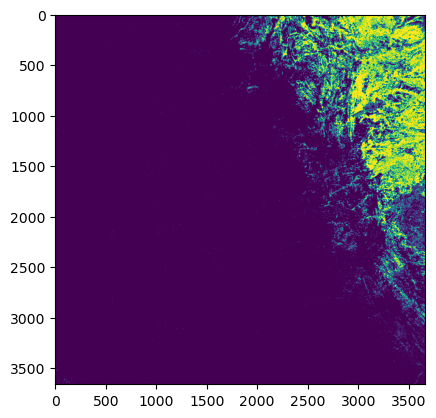

In [147]:
plt.imshow(evergreen_mask)

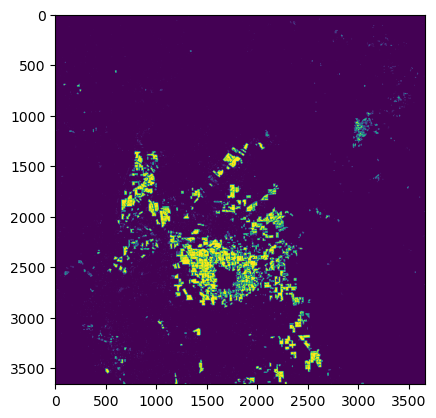

In [148]:
plt.imshow(grapes_mask)

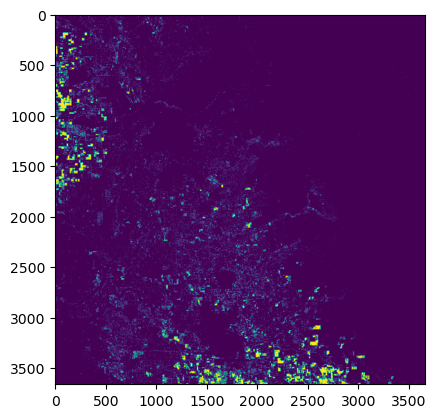

In [149]:
plt.imshow(almonds_mask)

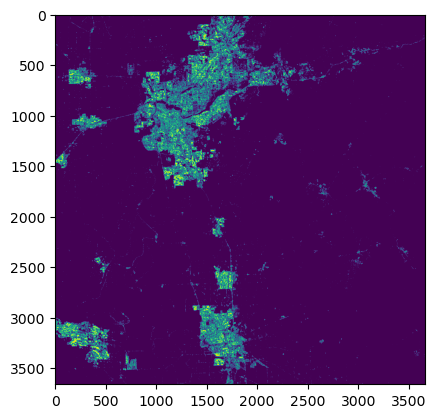

In [150]:
plt.imshow(devel_med_mask)

Above we can clearly see Sacramento, Davis, Woodland, Stockton. Good, hooray!

In [193]:
almonds_mask[900,50]

True

Excellent, we'll use location 900,50 from our array as an almond test point.

I checked locations all around it and they're all almonds too.

In [157]:
print(cdlrpj_affine)

| 30.00, 0.00, 600000.00|
| 0.00,-30.00, 4300020.00|
| 0.00, 0.00, 1.00|


In [154]:
print(src_CDL.bounds)
print(src_CDL.transform)

BoundingBox(left=-13918856.586382784, bottom=3655090.964396687, right=-12468686.586382784, top=5436130.964396687)
| 30.00, 0.00,-13918856.59|
| 0.00,-30.00, 5436130.96|
| 0.00, 0.00, 1.00|


In [155]:
print(src_green.bounds)
print(src_green.transform)

BoundingBox(left=600000.0, bottom=4190220.0, right=709800.0, top=4300020.0)
| 30.00, 0.00, 600000.00|
| 0.00,-30.00, 4300020.00|
| 0.00, 0.00, 1.00|


In [ ]:
#rasterio.transform.array_bounds(heig, width, transform)

Need to use tranform.xy to grab the coordinates of different spots....

In [163]:
rasterio.transform.xy(cdlrpj_affine,0,0,offset='ul')

(600000.0, 4300020.0)

Ok, upon reflection, here's what I think reporoject and transform.xy are doing.

Reproject is taking the destination raster extent, and mapping src values onto that extent the best it can ("the best it can" means it will interpolate or grab the spatially-nearest class).

Transofrm.xy is then reporting the coordinates (in the CRS), of the specified pixel location (e.g. row 0, column 23), which is true of *any* instance of this projection(/transform/affine).

**What I want to know is, when the CDL got reprojected (to match the green band), were classes pulled from, say, 10m away?

- one way to find out would be to go to higher resolution - say, 5m resolution, and see if all the 5m constituent pixels are the same.

In [165]:
src_CDL.crs.is_projected

True

In [175]:
fivem_rpj0 = reproject(source=src_CDL.read(1), # this is an array
          destination=src_green.read(1), # this is another array
          src_transform=src_CDL.transform, # this is the transform corresponding to first array
          src_crs=src_CDL.crs, # this is the crs corresponding to first array
          dst_transform=src_green.transform, # this is the transform corresponding to second array
          dst_crs=src_green.crs, # this is the crs corresponding to second array
          dst_resolution=5 #specify 5-meter resolution - otherwise we'd get 30)
                     )

# the output of the function should be an array that contains observation data from
# the first array, but has the crs and transform of the second array.

fivem_array0, fivem_affine0 = fivem_rpj0

fivem_rpj0

(array([[  3,   3,   3, ..., 176, 176, 176],
        [  3,   3,   3, ..., 176, 176, 176],
        [  3,   3,   3, ..., 176, 176, 176],
        ...,
        [152, 176, 176, ..., 176, 176, 152],
        [152, 176, 176, ..., 176, 176, 152],
        [176, 176, 176, ..., 176, 176, 176]], dtype=int16),
 Affine(30.0, 0.0, 600000.0,
        0.0, -30.0, 4300020.0))

In [178]:
fivem_array0.shape

(3660, 3660)

The above should not be the the case - I expected 6 times the number of pixels in each direction.

In [179]:
(fivem_array0 == cdlrpj_array).all()

True

In [180]:
(fivem_array0 == np.zeros((3660,3660))).all()

False

AttributeError: 'DatasetReader' object has no attribute 'resolution'

In [181]:
fivem_rpj1 = reproject(source=src_CDL.read(1), # this is an array
          destination=src_green.read(1), # this is another array
          src_transform=src_CDL.transform, # this is the transform corresponding to first array
          src_crs=src_CDL.crs, # this is the crs corresponding to first array
          #dst_transform=src_green.transform, # this is the transform corresponding to second array
          dst_crs=src_green.crs, # this is the crs corresponding to second array
          dst_resolution=5 #specify 5-meter resolution - otherwise we'd get 30)
                     )

# the output of the function should be an array that contains observation data from
# the first array, but has the crs and transform of the second array.

fivem_array1, fivem_affine1 = fivem_rpj1

fivem_rpj1

ValueError: Resolution cannot be used with dst_width and dst_height.

### Summary of above

Above I was able to reproject the CDL into the extent and projection of the HLS imagery. WHat I still don't know is how how near the CDL pizels are to the HLS pixels - and to verify this I can still do some more tests.

I will put those alignment tests **on hold** for now, because I know that the reprojected CDL is within 15m n-s and within 15m e-w of the HLS pixels.

Next step is to do some EDA of a surely-Almond location.

In [184]:
import os.path
import os

In [185]:
# where to go
#sat = 'L30'
year = 2020
tile_path = '10/S/F/H'
tile = '10SFH'
final_folder = f'HLS.{p}.{tile}.{year}{DOYstr}T183941.v2.0'
band = 'B03'

os.listdir()
.{0,1}

path = f'../data/hls_23feb23/{sat}/{year}/{tile_path}/{final_folder}/{final_folder}.{band}.tif'



refls = []
DOYs = []

#**import stuff from earlier**
# for path in paths....

for DOY in range(366):
    DOYstr = str(DOY).zfill(3)
    for p in ['L30','S30']:
        path = blah****
        if os.path.isfile(path):
            src = rasterio.open(path)
            arr = src.read(1)
            refl = arr[900,50]
            DOYs.append[DOY]
            refls.append[refl]

SyntaxError: invalid syntax (1580538358.py, line 7)

In [ ]:
# where to go
sat = 'L30'
year = 2020
tile_path = '10/S/F/H'
tile = '10SFH'
#final_folder = 'HLS.L30.T10SFH.2020007T183941.v2.0'
band = 'B03'


path = f'../data/hls_23feb23/{sat}/{year}/{tile_path}/{final_folder}/{final_folder}.{band}.tif'
